<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading data</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cross validation</a></span></li><li><span><a href="#Submission" data-toc-modified-id="Submission-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Submission</a></span></li></ul></div>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from tqdm.notebook import tqdm as tqdm
import sys
import pandas as pd
import numpy as np

import os
import gc

import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("max_colwidth", -1)
pd.set_option("max_columns", 500)
pd.set_option("max_rows", 500)


plt.style.use('fivethirtyeight')
plt.rcParams["axes.labelsize"] = 16
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

### Loading data

In [2]:
train = pd.read_csv("Train.csv", index_col=None)
print(train.shape)
train.head()

(1358, 16)


,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2


In [3]:
target = 'class'
cat_cols = []
num_cols = [col for col in train.columns if col not in [target]+cat_cols]; num_cols

['grade_A_Component_1',
 'grade_A_Component_2',
 'max_luminosity',
 'thickness',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'pixel_area',
 'log_area',
 'x_component_1',
 'x_component_2',
 'x_component_3',
 'x_component_4',
 'x_component_5']

In [4]:
test = pd.read_csv("Test.csv", index_col=None)
print(test.shape)
test.head()

(583, 15)


,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
0,1,0,123,65,33,54,1646439,1646893,632,632.391749,0,1,0,0,0
1,0,1,158,99,125,132,189874,189529,421,421.928609,0,0,0,0,0
2,0,1,120,35,64,75,12986873,12986862,272,272.212214,1,0,0,0,0
3,0,1,130,39,57,177,309634,310824,3312,3312.310581,0,0,1,0,0
4,1,0,142,75,23,79,5368307,5367467,862,862.499179,0,0,0,0,0


### Feature Engineering

In [5]:
def feature_engineering(df):
    # perform feature engineering here
    df['x_diff'] = df['xmax'] - df['xmin']
    df['max_luminosity_by_thickness'] = df['max_luminosity']/df['thickness']
    df['x_component_sum'] = df[component_cols].sum(axis=1)
    df['x_component_std'] = df[component_cols].std(axis=1)
    
    return df

In [6]:
component_cols = ['x_component_1',
'x_component_2',
'x_component_3',
'x_component_4',
'x_component_5']

train = feature_engineering(train)
test = feature_engineering(test)

In [7]:
train.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class,x_diff,max_luminosity_by_thickness,x_component_sum,x_component_std
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1,28,4.166667,1,0.447214
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1,8,2.436364,1,0.447214
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2,24,2.076923,0,0.000000
3,0,1,123,35,41,220,1705580,1705604,6803,6803.778622,0,0,1,0,0,1,179,3.514286,1,0.447214
4,1,0,138,69,462,466,1088124,1086579,251,251.401943,0,0,0,0,0,2,4,2.000000,0,0.000000


In [8]:
test.head()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,x_diff,max_luminosity_by_thickness,x_component_sum,x_component_std
0,1,0,123,65,33,54,1646439,1646893,632,632.391749,0,1,0,0,0,21,1.892308,1,0.447214
1,0,1,158,99,125,132,189874,189529,421,421.928609,0,0,0,0,0,7,1.595960,0,0.000000
2,0,1,120,35,64,75,12986873,12986862,272,272.212214,1,0,0,0,0,11,3.428571,1,0.447214
3,0,1,130,39,57,177,309634,310824,3312,3312.310581,0,0,1,0,0,120,3.333333,1,0.447214
4,1,0,142,75,23,79,5368307,5367467,862,862.499179,0,0,0,0,0,56,1.893333,0,0.000000


In [9]:
overall = train.append(test, sort=False)

train_data, test_data = overall[:len(train)].reset_index(drop=True), overall[len(train):].reset_index(drop=True)
train_data.shape, test_data.shape

((1358, 20), (583, 20))

### Cross validation

In [10]:
drop_cols = ['pixel_area']

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

preds = []

valid_score_list = []
cv = StratifiedKFold(n_splits=5) 
for i, (train_ind, test_ind) in enumerate(cv.split(train_data, train_data[target])):
    data_train = train_data.iloc[train_ind].reset_index(drop=True)
    data_valid = train_data.iloc[test_ind].reset_index(drop=True)
    data_test = test_data.reset_index(drop=True)
    
    clf = RandomForestClassifier(n_jobs=-1, n_estimators=3000, class_weight='balanced')
    X_train = data_train.drop([target]+drop_cols, axis=1)
    X_valid = data_valid.drop([target]+drop_cols, axis=1)
    X_test = data_test.drop([target]+drop_cols, axis=1)

    clf.fit(X_train, 
            data_train[target],)
    
    valid_prediction = clf.predict_proba(X_valid)
    valid_score = log_loss(data_valid[target], valid_prediction)
    valid_score_list.append(valid_score)
    print("FOLD:{} RMSE:{:0.2f}".format(i+1, valid_score))
    
    preds.append(clf.predict_proba(X_test))
    
print("CV score is {}".format(np.mean(valid_score_list)))

FOLD:1 RMSE:0.27
FOLD:2 RMSE:0.27
FOLD:3 RMSE:0.27
FOLD:4 RMSE:0.27
FOLD:5 RMSE:0.29
CV score is 0.27589483261382886


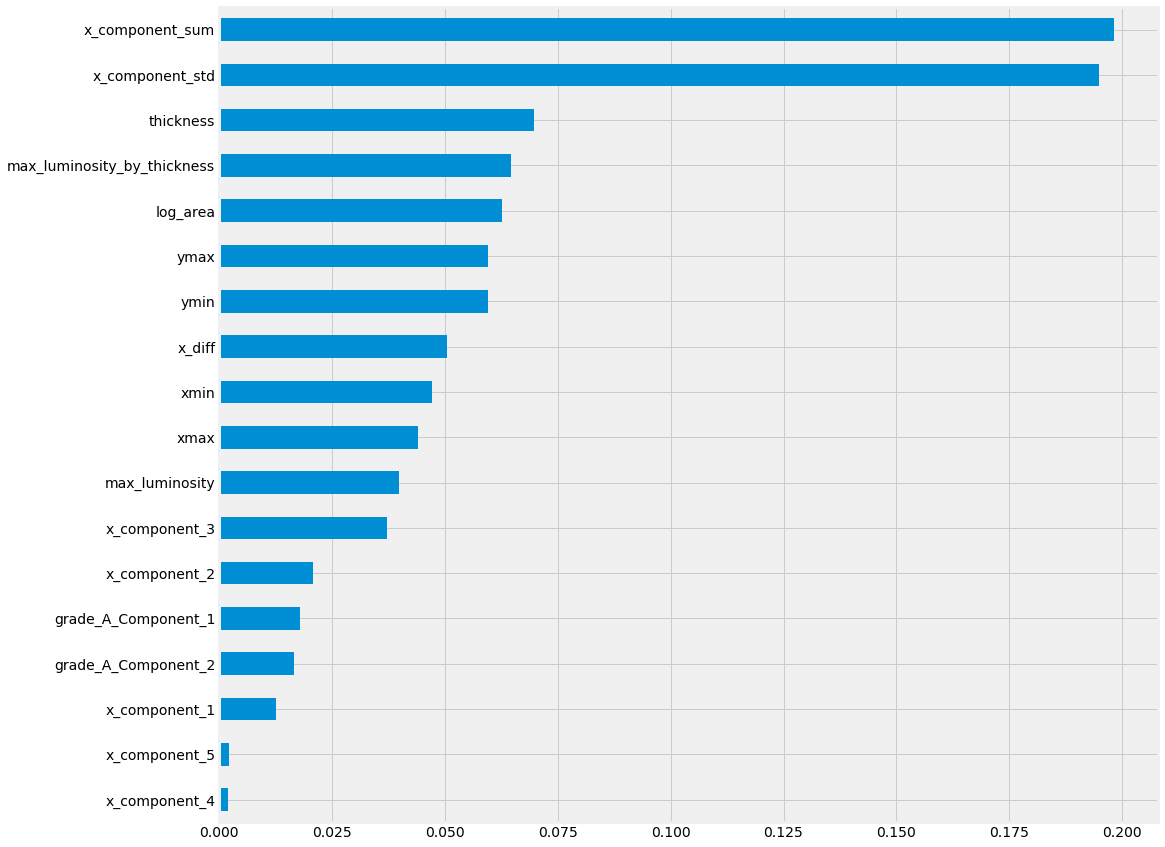

In [12]:
pd.Series(clf.feature_importances_, index=X_train.columns).sort_values().plot(kind='barh', figsize=(15,15))

### Submission

In [13]:
prediction = np.mean(preds, axis=0)

In [14]:
sub = pd.DataFrame(prediction, columns=[1,2])
sub.to_excel("model_rf_v3.xlsx", index=None)
sub.head()

,1,2
0,0.999667,0.000333
1,0.133867,0.866133
2,0.997067,0.002933
3,0.997600,0.002400
4,0.499933,0.500067
